In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("Fraud_check.csv")

In [4]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [12]:
data["Taxable_Income"]=1

In [14]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1


In [19]:
l=[]
for i in data["Taxable.Income"]:
    if i<=30000:
        l.append("Risky")
    else:
        l.append("Good")
        
data["Taxable_Income"]=l 

In [20]:
data.sample(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
385,NO,Single,96438,140132,27,NO,Good
536,NO,Single,40674,157025,14,NO,Good
398,NO,Married,17440,64070,2,YES,Risky
229,NO,Married,75170,35780,10,NO,Good
516,YES,Single,99239,76337,18,YES,Good
106,YES,Single,19169,58535,20,YES,Risky
405,NO,Divorced,73313,140266,28,NO,Good
116,NO,Married,42784,132570,12,NO,Good
542,YES,Married,34655,199778,27,NO,Good
458,YES,Single,10455,110892,18,YES,Risky


In [22]:
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [23]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [24]:
label_encoder=preprocessing.LabelEncoder()
data["Undergrad"]=label_encoder.fit_transform(data["Undergrad"])
data["Marital.Status"]=label_encoder.fit_transform(data["Marital.Status"])
data["Urban"]=label_encoder.fit_transform(data["Urban"])
data["Taxable_Income"]=label_encoder.fit_transform(data["Taxable_Income"])

In [25]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


<AxesSubplot:xlabel='Undergrad', ylabel='Taxable_Income'>

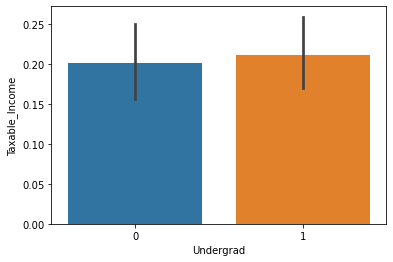

In [29]:
sns.barplot(data["Undergrad"],data["Taxable_Income"])

<AxesSubplot:xlabel='City.Population', ylabel='Taxable_Income'>

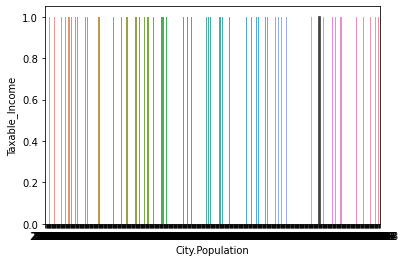

In [30]:
sns.barplot(data["City.Population"],data["Taxable_Income"])

In [31]:
data.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
Taxable_Income,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


<AxesSubplot:>

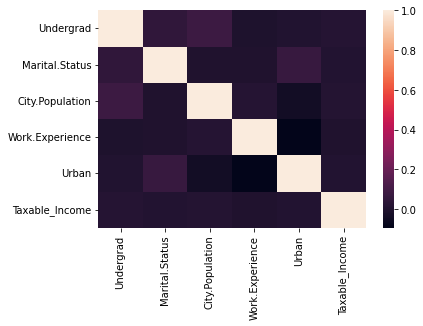

In [32]:
sns.heatmap(data.corr())

In [34]:
array=data.values

In [46]:
X=array[:,0:5]
Y=array[:,-1]

In [39]:
X

array([[     0,      2,  50047,     10,      1],
       [     1,      0, 134075,     18,      1],
       [     0,      1, 160205,     30,      1],
       ...,
       [     0,      0, 154058,      0,      1],
       [     1,      1, 180083,     17,      0],
       [     0,      0, 158137,     16,      0]], dtype=int64)

In [40]:
X.shape

(600, 5)

In [47]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Gini Criteria

In [68]:
model=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=0)

In [69]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [70]:
y_pred=model.predict(X_test)

In [71]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [72]:
metrics.accuracy_score(y_pred,Y_test)

0.775

[Text(531.4285714285714, 830.5, 'Work.Experience <= 24.5\ngini = 0.327\nsamples = 480\nvalue = [381, 99]\nclass = 0'),
 Text(381.9642857142857, 679.5, 'City.Population <= 197770.0\ngini = 0.349\nsamples = 373\nvalue = [289, 84]\nclass = 0'),
 Text(265.7142857142857, 528.5, 'Work.Experience <= 14.5\ngini = 0.343\nsamples = 369\nvalue = [288, 81]\nclass = 0'),
 Text(132.85714285714286, 377.5, 'Work.Experience <= 11.5\ngini = 0.3\nsamples = 239\nvalue = [195, 44]\nclass = 0'),
 Text(66.42857142857143, 226.5, 'City.Population <= 27057.0\ngini = 0.337\nsamples = 182\nvalue = [143, 39]\nclass = 0'),
 Text(33.214285714285715, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(99.64285714285714, 75.5, 'gini = 0.332\nsamples = 181\nvalue = [143, 38]\nclass = 0'),
 Text(199.28571428571428, 226.5, 'Work.Experience <= 13.5\ngini = 0.16\nsamples = 57\nvalue = [52, 5]\nclass = 0'),
 Text(166.07142857142858, 75.5, 'gini = 0.054\nsamples = 36\nvalue = [35, 1]\nclass = 0'),
 Text(232.5,

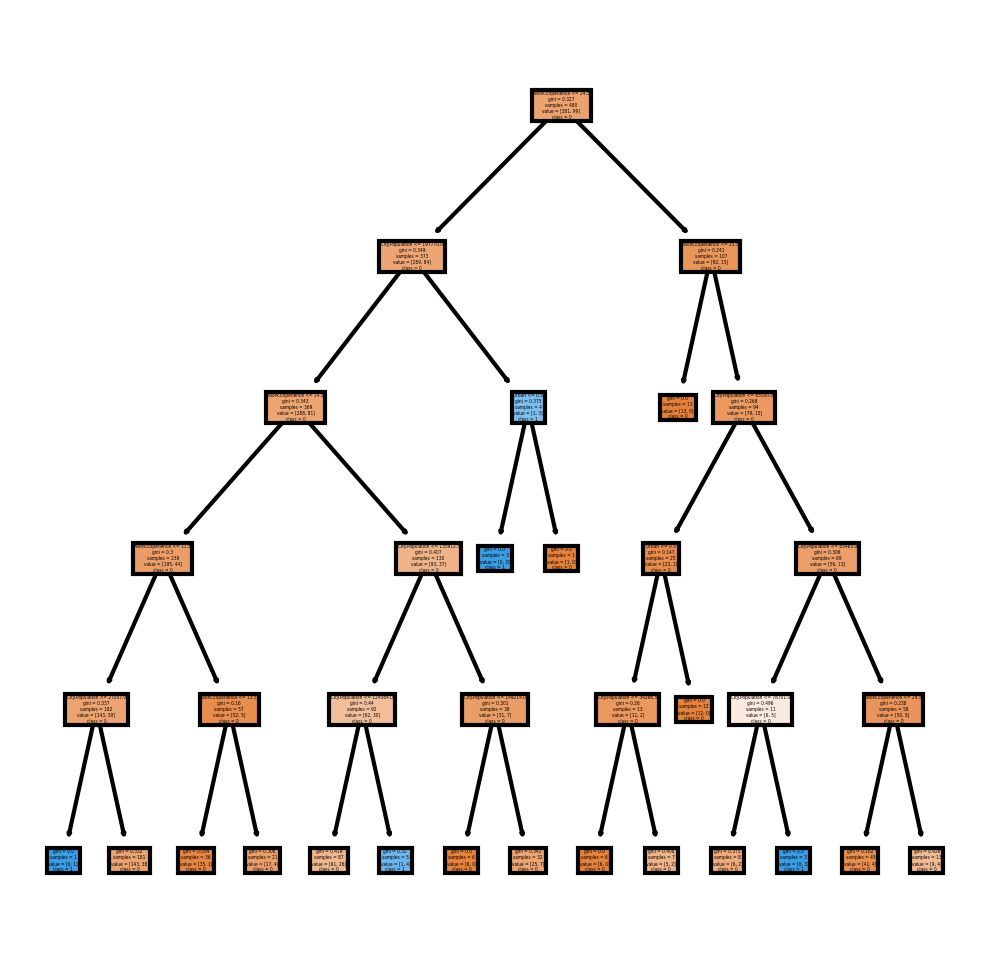

In [73]:
fn=["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]
cn=["0","1"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

# Entropy Criteria

In [74]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=0)

In [75]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [76]:
y_pred=model.predict(X_test)

In [77]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [78]:
metrics.accuracy_score(y_pred,Y_test)

0.7916666666666666

# Decision Tree Regression Model

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
model=DecisionTreeRegressor(max_depth=5,random_state=0)

In [81]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [84]:
from sklearn import metrics
pred=model.predict(X_test)
metrics.mean_squared_error(Y_test,pred)

0.18884671340457632

In [85]:
metrics.mean_absolute_percentage_error(Y_test,pred)

700393632875942.9

In [88]:
np.mean(np.abs(Y_test-pred)/np.array(Y_test))

nan

[Text(191.31428571428572, 199.32, 'X[3] <= 24.5\nmse = 0.164\nsamples = 480\nvalue = 0.206'),
 Text(137.50714285714287, 163.07999999999998, 'X[2] <= 197770.0\nmse = 0.174\nsamples = 373\nvalue = 0.225'),
 Text(95.65714285714286, 126.83999999999999, 'X[3] <= 14.5\nmse = 0.171\nsamples = 369\nvalue = 0.22'),
 Text(47.82857142857143, 90.6, 'X[3] <= 11.5\nmse = 0.15\nsamples = 239\nvalue = 0.184'),
 Text(23.914285714285715, 54.359999999999985, 'X[2] <= 27057.0\nmse = 0.168\nsamples = 182\nvalue = 0.214'),
 Text(11.957142857142857, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(35.871428571428574, 18.119999999999976, 'mse = 0.166\nsamples = 181\nvalue = 0.21'),
 Text(71.74285714285715, 54.359999999999985, 'X[3] <= 13.5\nmse = 0.08\nsamples = 57\nvalue = 0.088'),
 Text(59.785714285714285, 18.119999999999976, 'mse = 0.027\nsamples = 36\nvalue = 0.028'),
 Text(83.7, 18.119999999999976, 'mse = 0.154\nsamples = 21\nvalue = 0.19'),
 Text(143.4857142857143, 90.6, 'X[2] <= 135912

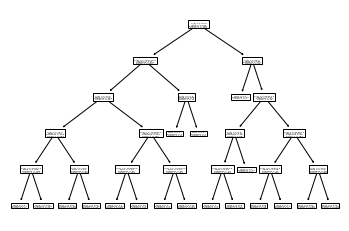

In [89]:
tree.plot_tree(model)

[Text(531.4285714285714, 830.5, 'Work.Experience <= 24.5\nmse = 0.164\nsamples = 480\nvalue = 0.206'),
 Text(381.9642857142857, 679.5, 'City.Population <= 197770.0\nmse = 0.174\nsamples = 373\nvalue = 0.225'),
 Text(265.7142857142857, 528.5, 'Work.Experience <= 14.5\nmse = 0.171\nsamples = 369\nvalue = 0.22'),
 Text(132.85714285714286, 377.5, 'Work.Experience <= 11.5\nmse = 0.15\nsamples = 239\nvalue = 0.184'),
 Text(66.42857142857143, 226.5, 'City.Population <= 27057.0\nmse = 0.168\nsamples = 182\nvalue = 0.214'),
 Text(33.214285714285715, 75.5, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(99.64285714285714, 75.5, 'mse = 0.166\nsamples = 181\nvalue = 0.21'),
 Text(199.28571428571428, 226.5, 'Work.Experience <= 13.5\nmse = 0.08\nsamples = 57\nvalue = 0.088'),
 Text(166.07142857142858, 75.5, 'mse = 0.027\nsamples = 36\nvalue = 0.028'),
 Text(232.5, 75.5, 'mse = 0.154\nsamples = 21\nvalue = 0.19'),
 Text(398.57142857142856, 377.5, 'City.Population <= 135912.5\nmse = 0.204\nsamples = 130

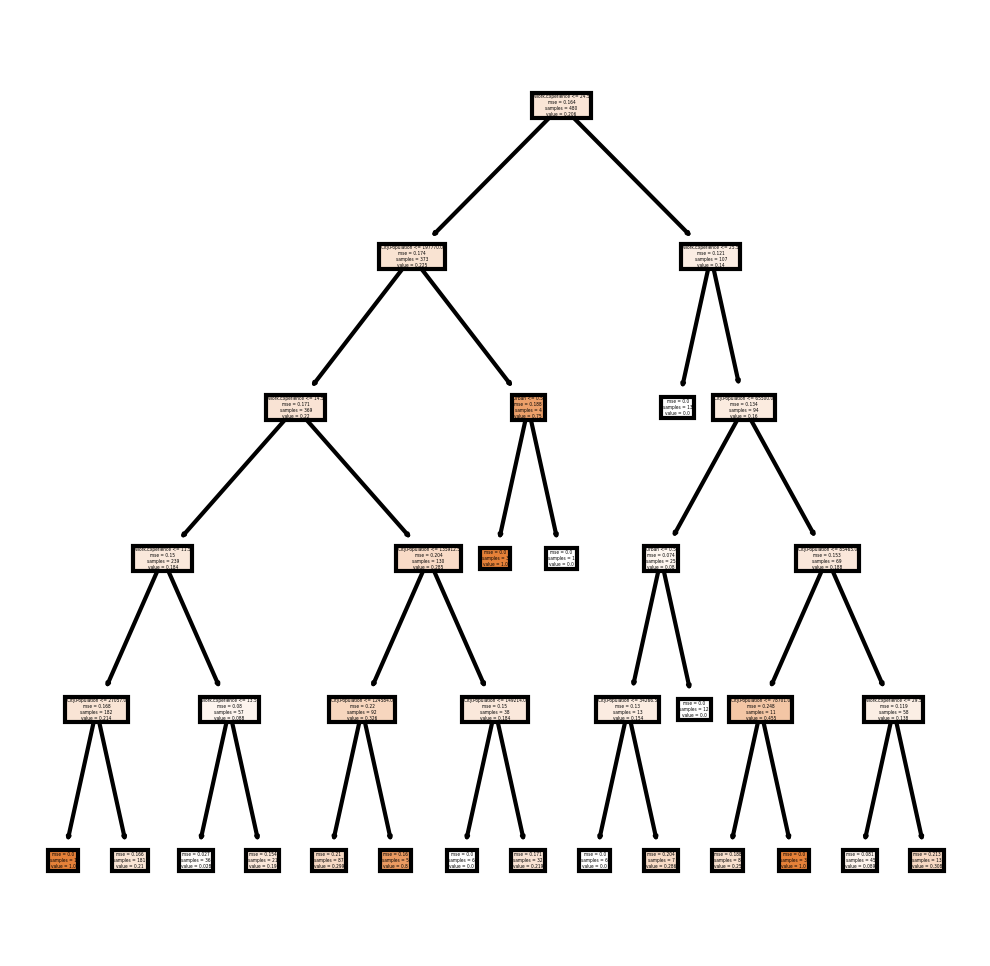

In [90]:
fn=["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]
cn=["0","1"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)